<a href="https://colab.research.google.com/github/Adityasah256/Farmholic/blob/main/Fake_News_Detection_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **- Fake news detection**


Dataset's official link- https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php <br>
Algorithmic comparison - Logistic regression, ADA, PAC, XGBoost, Random Forest, Naive Bayes, Decision Tree, SVM



## Importing the required libraries

In [ ]:
#dataset handling and operations
from google.colab import drive
import re,string,unicodedata
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from wordcloud import WordCloud, STOPWORDS

#nlp pre-processing
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet

#vectorizers and splitting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,naive_bayes
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier

#metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# from sklearn.metrics import plot_confusion_matrix,precision_score,f1_score,recall_score,plot_roc_curve
# from sklearn import metrics

#for rnn-lstm
#import tensorflow as tf
#from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading the datasets from Google Drive

## Reading the input CSV files

In [ ]:
fake_df = pd.read_csv('/content/Fake.csv')
#fake_df=pd.read_csv('/content/Fake.csv', engine="python")
#true_df=pd.read_csv('/content/Fake.csv', engine="python")
true_df = pd.read_csv('/content/True.csv')

In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
true_df.shape

(21417, 4)

In [ ]:
fake_df.sample(5)

,title,text,subject,date
9250,PHILADELPHIA Committee Passes Bill Forcing Sto...,"What s more important, protecting the dignity ...",politics,"Dec 7, 2017"
3118,Cops Put Trump-Backed Breitbart To SHAME For ...,"Donald Trump loves the right-wing, white supre...",News,"January 7, 2017"
7310,North Carolina GOP Makes State Crappier Place...,North Carolina Republicans jammed another bigo...,News,"March 24, 2016"
7299,Liberals Brilliantly Troll The GOP With A Pet...,"Every time a school shooting happens, the idio...",News,"March 25, 2016"
7408,This Proof Of Evolution In Humans Will Make C...,Conservatives constantly insist that there is ...,News,"March 19, 2016"


In [ ]:
true_df.sample(5)

,title,text,subject,date
13218,"France close to Qatar military, transport cont...",PARIS (Reuters) - France is close to finalizin...,worldnews,"December 4, 2017"
10650,Senator McCain wants hearing on possible F-16 ...,WASHINGTON (Reuters) - U.S. Senator John McCai...,politicsNews,"February 25, 2016"
9755,In the battle for Hollywood endorsements - and...,LOS ANGELES (Reuters) - Democratic presidentia...,politicsNews,"April 26, 2016"
12319,Russia's Putin laments 'spymania' gripping Was...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"December 14, 2017"
13374,Ukraine president: reforms to get harder as el...,KIEV (Reuters) - Ukrainian President Petro Por...,worldnews,"December 1, 2017"


## Checking for null values

In [ ]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Dropping the unrequired columns

In [ ]:
fake_df.drop(['subject','date'],axis=1,inplace=True)

In [ ]:
true_df.drop(['subject','date'],axis=1,inplace=True)

## Checking the distribution of fake news vs true news

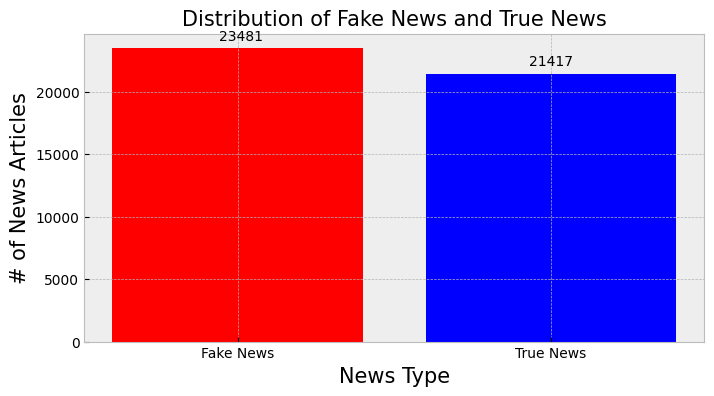

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('True News', len(true_df), color='blue')
plt.title('Distribution of Fake News and True News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.annotate(len(fake_df), # this is the text
                (0.01,23000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.annotate(len(true_df), # this is the text
                (1,21000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.show()

## Concatenating the title and text columns

In [ ]:
fake_df['news'] = fake_df['title'] + fake_df['text']
fake_df['label'] = 0
fake_df.drop(['title','text'], axis=1, inplace=True)

In [ ]:
true_df['news'] = true_df['title'] + true_df['text']
true_df['label'] = 1
true_df.drop(['title','text'], axis=1, inplace=True)

In [ ]:
fake_df.sample(2)

,news,label
13045,RAW VIDEO: A SHOCKING TOUR Of The Detroit Ghet...,0
20654,OVER 100 COLLEGES WILL HOLD SEPARATE GRADUATIO...,0


In [ ]:
true_df.sample(2)

,news,label
14269,Iraq relocates hundreds of foreign wives and c...,1
15819,Libyan force ready to cooperate on UK extradit...,1


## Visualizing the news using wordcloud

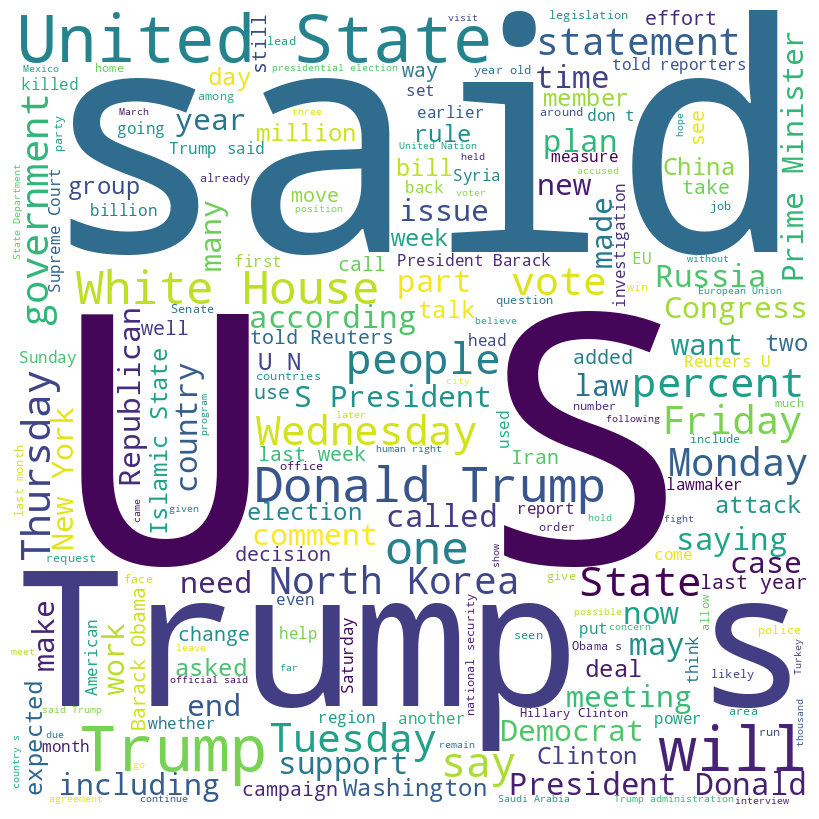

In [ ]:
stopwords = set(STOPWORDS)

words_li_true = list(true_df['news'])
string_of_words_true = " ".join(words_li_true)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(string_of_words_true)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

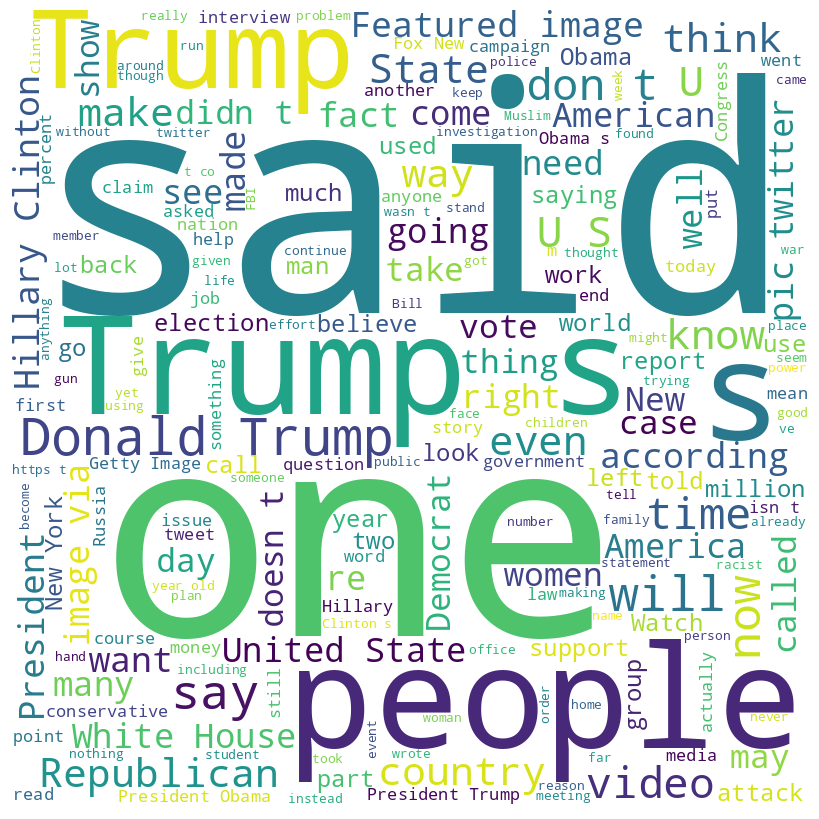

In [ ]:
words_li_fake = list(fake_df['news'])
string_of_words_fake = " ".join(words_li_fake)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(string_of_words_fake)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Concatenating the true and fake news datasets

In [ ]:
df = pd.concat([fake_df, true_df], ignore_index=True, sort=False)

In [ ]:
df.sample(5)

,news,label
39497,Syrian government says ready to take part in M...,1
29142,Over 9.2 million sign for Obamacare amid Trump...,1
29318,President Trump appoints Homan acting director...,1
23988,U.S. Senate liberals propose new steps for Pue...,1
829,Less Than Half Of Trump Voters Believe Donald...,0


## Using NLP to pre-process the news text

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
lemmatizer=WordNetLemmatizer()
import re
for index,row in df.iterrows():
    filter_sentence = ''

    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',str(sentence)) #cleaning

    words = nltk.word_tokenize(sentence) #tokenization

    words = [w for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #try with stemming

    df.loc[index,'news'] = filter_sentence

In [ ]:
df.sample(5)

,news,label
21696,video baltimore mayor tries to embarrass fox ...,0
23233,spectre of benghazi doj drops charges against...,0
16703,four previously deported illegal aliens charg...,0
28467,kansas senator stand comparison planned paren...,1
18311,reebok joins the lefts war against president ...,0


In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(df['news'])
freq_term_matrix = count_vectorizer.transform(df['news'])
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [ ]:
pd.DataFrame(print(freq_term_matrix))

  (0, 5142)	1
  (0, 5763)	1
  (0, 6371)	1
  (0, 6577)	2
  (0, 6587)	1
  (0, 6979)	1
  (0, 7344)	1
  (0, 7498)	2
  (0, 7630)	2
  (0, 7668)	1
  (0, 7670)	1
  (0, 7679)	3
  (0, 9595)	13
  (0, 12832)	1
  (0, 13858)	1
  (0, 15435)	1
  (0, 19690)	1
  (0, 19702)	1
  (0, 20893)	1
  (0, 21534)	1
  (0, 21794)	1
  (0, 22191)	3
  (0, 22331)	1
  (0, 22403)	1
  (0, 23154)	1
  :	:
  (44897, 208333)	2
  (44897, 208553)	1
  (44897, 209803)	1
  (44897, 210916)	1
  (44897, 211481)	1
  (44897, 212098)	1
  (44897, 212196)	1
  (44897, 213244)	1
  (44897, 216032)	1
  (44897, 216270)	1
  (44897, 218042)	2
  (44897, 220021)	1
  (44897, 223180)	1
  (44897, 223510)	3
  (44897, 223569)	1
  (44897, 226313)	2
  (44897, 226502)	1
  (44897, 228050)	2
  (44897, 228294)	1
  (44897, 230042)	1
  (44897, 231918)	1
  (44897, 236162)	1
  (44897, 237427)	1
  (44897, 243790)	3
  (44897, 245160)	1


""


In [ ]:
pd.DataFrame(print(tf_idf_matrix))

  (0, 245518)	0.06791817718326232
  (0, 245325)	0.08412503657433881
  (0, 245160)	0.20048706785446999
  (0, 245116)	0.07266367527253345
  (0, 244156)	0.02727099546360379
  (0, 243817)	0.022951077083622266
  (0, 243120)	0.018832852544379147
  (0, 243023)	0.023435822729746203
  (0, 242863)	0.03291994165350629
  (0, 242193)	0.16371757833191053
  (0, 241114)	0.02783910197282644
  (0, 241004)	0.028191649671708067
  (0, 240657)	0.023304634043558554
  (0, 240187)	0.022398668846519167
  (0, 240176)	0.07543961370200095
  (0, 240166)	0.052386074171907625
  (0, 239941)	0.07543961370200095
  (0, 237427)	0.03373800689653733
  (0, 236291)	0.02771907362362119
  (0, 231555)	0.025522819510195055
  (0, 227124)	0.02923553694055433
  (0, 227077)	0.07948340142277982
  (0, 225207)	0.08205751265650113
  (0, 219557)	0.0165138469157832
  (0, 219392)	0.03212885506478138
  :	:
  (44897, 55699)	0.08372853864339365
  (44897, 54830)	0.08702392150836498
  (44897, 53606)	0.03956622282411075
  (44897, 53329)	0.2424475

""


## Splitting the dataset into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, df['label'], random_state=0)

## Logistic Regression

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

LOGISTIC REGRESSION: PERFORMANCE METRICS


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

0.9879732739420936


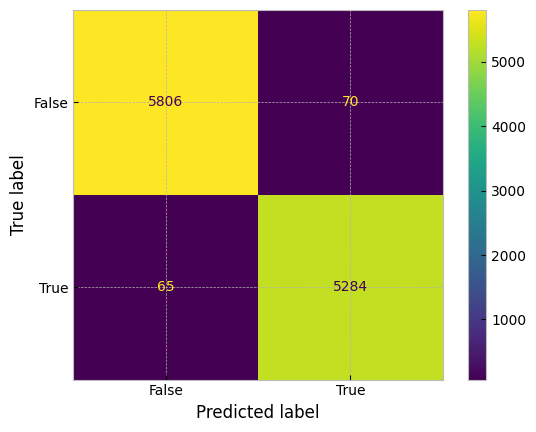

Precision: 98.69%
F1 Score: 98.74%
Recall: 98.78%


In [ ]:
predictions_lr=logistic_regression.predict(X_test)
from sklearn import metrics
print("LOGISTIC REGRESSION: PERFORMANCE METRICS\n\n")

# accuracy_logistic = accuracy_score(y_test, predictions_lr)
# print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

precision_logistic = precision_score(y_test, predictions_lr, average=None)
print(classification_report(y_test, predictions_lr))
accuracy_lr=accuracy_score(y_test,predictions_lr)
print(accuracy_lr)
confusion_matrix = metrics.confusion_matrix(y_test, predictions_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print("Precision: %.2f%%" % (precision_logistic[1] * 100.0))

f1score_logistic= f1_score(y_test, predictions_lr, average=None)
print("F1 Score: %.2f%%" % (f1score_logistic[1] * 100.0))

recall_logistic = recall_score(y_test, predictions_lr, average=None)
print("Recall: %.2f%%" % (recall_logistic[1] * 100.0))

## ADA

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada_classifier = abc.fit(X_train, y_train)

ADA BOOT CLASSIFIER: PERFORMANCE METRICS


0.9882405345211581
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



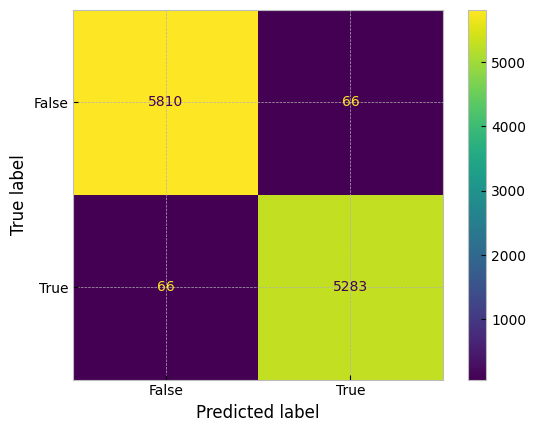

Precision: 98.77%
F1 Score: 98.77%
Recall: 98.77%


In [ ]:
#Predict the response for test dataset
predictions_ada = ada_classifier.predict(X_test)

print("ADA BOOT CLASSIFIER: PERFORMANCE METRICS\n\n")
accuracy_ada=accuracy_score(y_test,predictions_ada)
print(accuracy_ada)

print(classification_report(y_test, predictions_ada))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_ada)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
# accuracy_ada = accuracy_score(y_test, predictions_ada)
# print("Accuracy: %.2f%%" % (accuracy_ada * 100.0))

precision_ada = precision_score(y_test, predictions_ada, average=None)
print("Precision: %.2f%%" % (precision_ada[1] * 100.0))

f1score_ada = f1_score(y_test, predictions_ada, average=None)
print("F1 Score: %.2f%%" % (f1score_ada[1] * 100.0))

recall_ada = recall_score(y_test, predictions_ada, average=None)
print("Recall: %.2f%%" % (recall_ada[1] * 100.0))

## PAC

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac_classifier = pac.fit(X_train,y_train)

PASSIVE AGGRESSIVE CLASSIFIER: PERFORMANCE METRICS


0.995456570155902
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5876
           1       1.00      1.00      1.00      5349

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



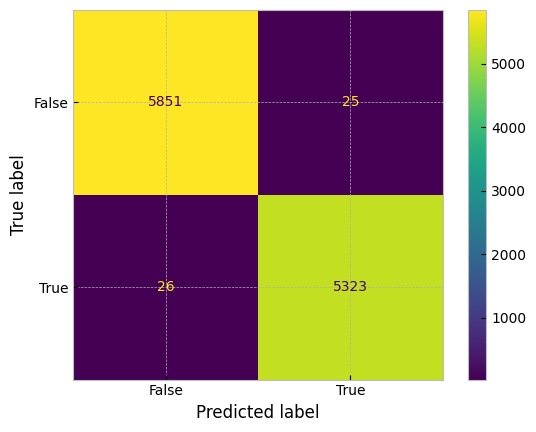

Precision: 99.53%
F1 Score: 99.52%
Recall: 99.51%


In [ ]:
#Predict the response for test dataset
predictions_pac = pac_classifier.predict(X_test)

print("PASSIVE AGGRESSIVE CLASSIFIER: PERFORMANCE METRICS\n\n")
accuracy_pac=accuracy_score(y_test,predictions_pac)
print(accuracy_pac)

print(classification_report(y_test, predictions_pac))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_pac)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# accuracy_pac = accuracy_score(y_test, predictions_pac)
# print("Accuracy: %.2f%%" % (accuracy_pac * 100.0))

precision_pac = precision_score(y_test, predictions_pac, average=None)
print("Precision: %.2f%%" % (precision_pac[1] * 100.0))

f1score_pac = f1_score(y_test, predictions_pac, average=None)
print("F1 Score: %.2f%%" % (f1score_pac[1] * 100.0))

recall_pac = recall_score(y_test, predictions_pac, average=None)
print("Recall: %.2f%%" % (recall_pac[1] * 100.0))

## XGBoost

In [ ]:
xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

XG BOOST: PERFORMANCE METRICS


0.995456570155902
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5876
           1       1.00      0.99      1.00      5349

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



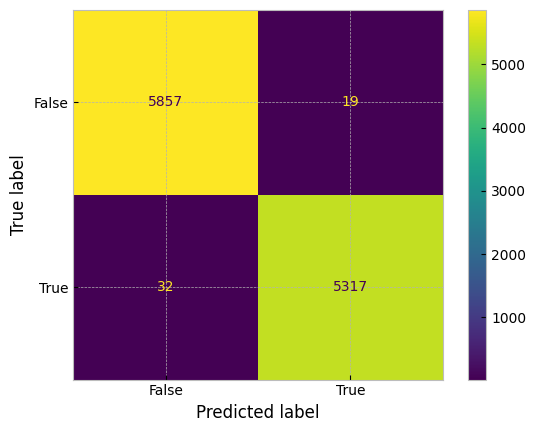

Precision: 99.64%
F1 Score: 99.52%
Recall: 99.40%


In [ ]:
predictions_xgb = xgb_classifier.predict(X_test)
predictions_xgbf = [round(value) for value in predictions_xgb]
# evaluate predictions

print("XG BOOST: PERFORMANCE METRICS\n\n")
accuracy_xgb=accuracy_score(y_test,predictions_xgb)
print(accuracy_xgb)

print(classification_report(y_test, predictions_xgb))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# accuracy_xgb = accuracy_score(y_test, predictions_xgbf)
# print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

precision_xgb = precision_score(y_test, predictions_xgbf, average=None)
print("Precision: %.2f%%" % (precision_xgb[1] * 100.0))

f1score_xgb = f1_score(y_test, predictions_xgbf, average=None)
print("F1 Score: %.2f%%" % (f1score_xgb[1] * 100.0))

recall_xgb = recall_score(y_test, predictions_xgbf, average=None)
print("Recall: %.2f%%" % (recall_xgb[1] * 100.0))

## Random Forest

In [ ]:
# Instantiate model with 30 decision trees
rf = RandomForestClassifier(n_estimators = 30)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

RANDOM FOREST: PERFORMANCE METRICS


0.9830734966592427
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5876
           1       0.98      0.98      0.98      5349

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



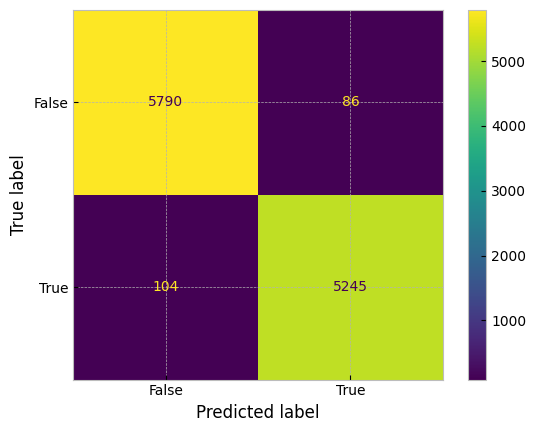

Precision: 98.39%
F1 Score: 98.22%
Recall: 98.06%


In [ ]:
# make predictions for test data
y_pred_rf = rf.predict(X_test)
predictions_rf = [round(value) for value in y_pred_rf]

print("RANDOM FOREST: PERFORMANCE METRICS\n\n")
accuracy_rf=accuracy_score(y_test,predictions_rf)
print(accuracy_rf)

print(classification_report(y_test, predictions_rf))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# accuracy_rf = accuracy_score(y_test, predictions_rf)
# print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

precision_rf = precision_score(y_test, predictions_rf, average=None)
print("Precision: %.2f%%" % (precision_rf[1] * 100.0))

f1score_rf = f1_score(y_test, predictions_rf, average=None)
print("F1 Score: %.2f%%" % (f1score_rf[1] * 100.0))

recall_rf = recall_score(y_test, predictions_rf, average=None)
print("Recall: %.2f%%" % (recall_rf[1] * 100.0))

## Naive Bayes

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
naive_classifier = Naive.fit(X_train,y_train)

NAIVE BAYES: PERFORMANCE METRICS


0.9523385300668151
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5876
           1       0.95      0.95      0.95      5349

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



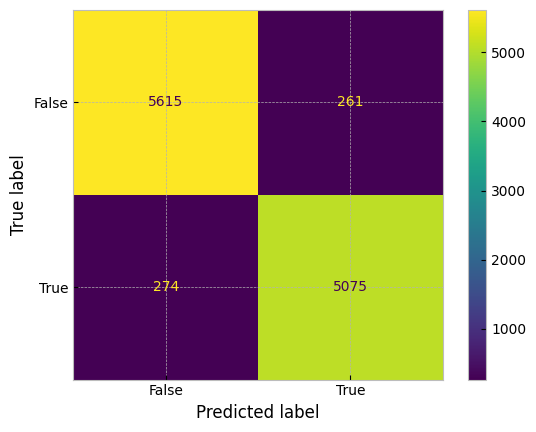

Precision: 95.11%
F1 Score: 94.99%
Recall: 94.88%


In [ ]:
# make predictions for test data
predictions_NB = Naive.predict(X_test)

print("NAIVE BAYES: PERFORMANCE METRICS\n\n")
accuracy_NB=accuracy_score(y_test,predictions_NB)
print(accuracy_NB)

print(classification_report(y_test, predictions_NB))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_NB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# accuracy_nb = accuracy_score(y_test, predictions_NB)
# print("Accuracy: %.2f%%" % (accuracy_nb * 100.0))

precision_nb = precision_score(y_test, predictions_NB, average=None)
print("Precision: %.2f%%" % (precision_nb[1] * 100.0))

f1score_nb = f1_score(y_test, predictions_NB, average=None)
print("F1 Score: %.2f%%" % (f1score_nb[1] * 100.0))

recall_nb = recall_score(y_test, predictions_NB, average=None)
print("Recall: %.2f%%" % (recall_nb[1] * 100.0))

## SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier = SVM.fit(X_train,y_train)

SUPPORT VECTOR MACHINES: PERFORMANCE METRICS


0.9948329621380846
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5876
           1       0.99      1.00      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



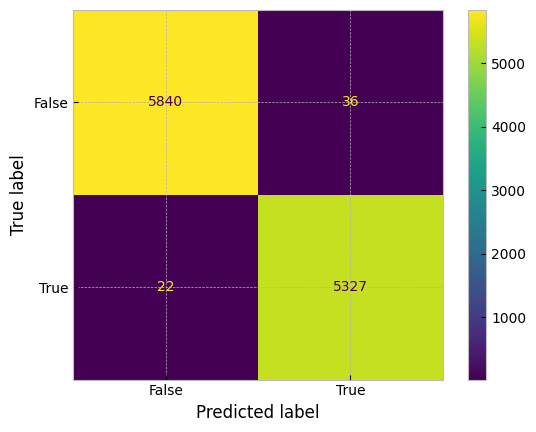

Precision: 99.33%
F1 Score: 99.46%
Recall: 99.59%


In [ ]:
# make predictions for test data
predictions_SVM = SVM.predict(X_test)

print("SUPPORT VECTOR MACHINES: PERFORMANCE METRICS\n\n")
accuracy_SVM=accuracy_score(y_test,predictions_SVM)
print(accuracy_SVM)

print(classification_report(y_test, predictions_SVM))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_SVM)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# accuracy_svm = accuracy_score(y_test, predictions_SVM)
# print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

precision_svm = precision_score(y_test, predictions_SVM, average=None)
print("Precision: %.2f%%" % (precision_svm[1] * 100.0))

f1score_svm = f1_score(y_test, predictions_SVM, average=None)
print("F1 Score: %.2f%%" % (f1score_svm[1] * 100.0))

recall_svm = recall_score(y_test, predictions_SVM, average=None)
print("Recall: %.2f%%" % (recall_svm[1] * 100.0))

## Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train,y_train)

DECISION TREE: PERFORMANCE METRICS


0.9861024498886414
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.98      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

0.9861024498886414


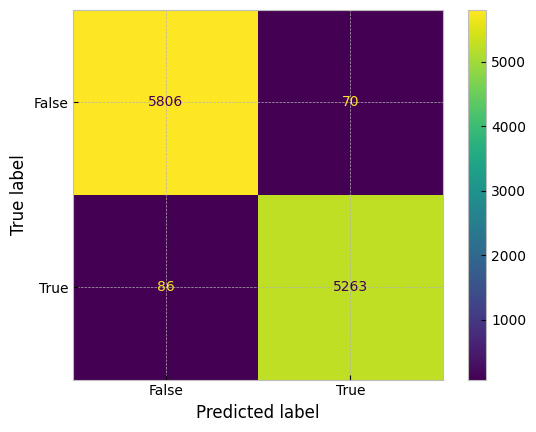

Precision: 98.69%
F1 Score: 98.54%
Recall: 98.39%


In [ ]:
# make predictions for test data
predictions_dt = dt_clf.predict(X_test)

print("DECISION TREE: PERFORMANCE METRICS\n\n")
accuracy_dt=accuracy_score(y_test,predictions_dt)
print(accuracy_dt)
print(classification_report(y_test, predictions_dt))
print(accuracy_score(y_test,predictions_dt))
confusion_matrix = metrics.confusion_matrix(y_test, predictions_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# accuracy_dt = accuracy_score(y_test, predictions_dt)
# print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

precision_dt = precision_score(y_test, predictions_dt, average=None)
print("Precision: %.2f%%" % (precision_dt[1] * 100.0))

f1score_dt = f1_score(y_test, predictions_dt, average=None)
print("F1 Score: %.2f%%" % (f1score_dt[1] * 100.0))

recall_dt = recall_score(y_test, predictions_dt, average=None)
print("Recall: %.2f%%" % (recall_dt[1] * 100.0))

In [ ]:
from sklearn.metrics import accuracy_score

## Comparing the models wrt performance

In [ ]:
var_models = ['Logstic Regression', 'ADA', 'PAC', 'XGB','RF','Naive Bayes','SVM','DT']#'RNN']

var_accuracy = [accuracy_lr,accuracy_ada,accuracy_pac,accuracy_xgb,accuracy_rf,accuracy_NB,accuracy_SVM,accuracy_dt]#accuracy_rnn]
var_precision = [precision_logistic[1],precision_ada[1],precision_pac[1],precision_xgb[1],precision_rf[1],precision_nb[1],precision_svm[1],precision_dt[1]]#precision_rnn[1]]
var_f1score = [f1score_logistic[1],f1score_ada[1],f1score_pac[1],f1score_xgb[1],f1score_rf[1],f1score_nb[1],f1score_svm[1],f1score_dt[1]]#f1score_rnn[1]]
var_recall = [recall_logistic[1],recall_ada[1],recall_pac[1],recall_xgb[1],recall_rf[1],recall_nb[1],recall_svm[1],recall_dt[1]]#recall_rnn[1]]

In [ ]:

metrics = pd.DataFrame({'Models': var_models, 'Accuracy': var_accuracy})#,'Precision': var_precision, 'F1 Score': var_f1score, 'Recall':var_recall})

print("Table of Comparison:\n\n")
metrics

Table of Comparison:




,Models,Accuracy
0,Logstic Regression,0.987973
1,ADA,0.988241
2,PAC,0.995457
3,XGB,0.995457
4,RF,0.983073
5,Naive Bayes,0.952339
6,SVM,0.994833
7,DT,0.986102


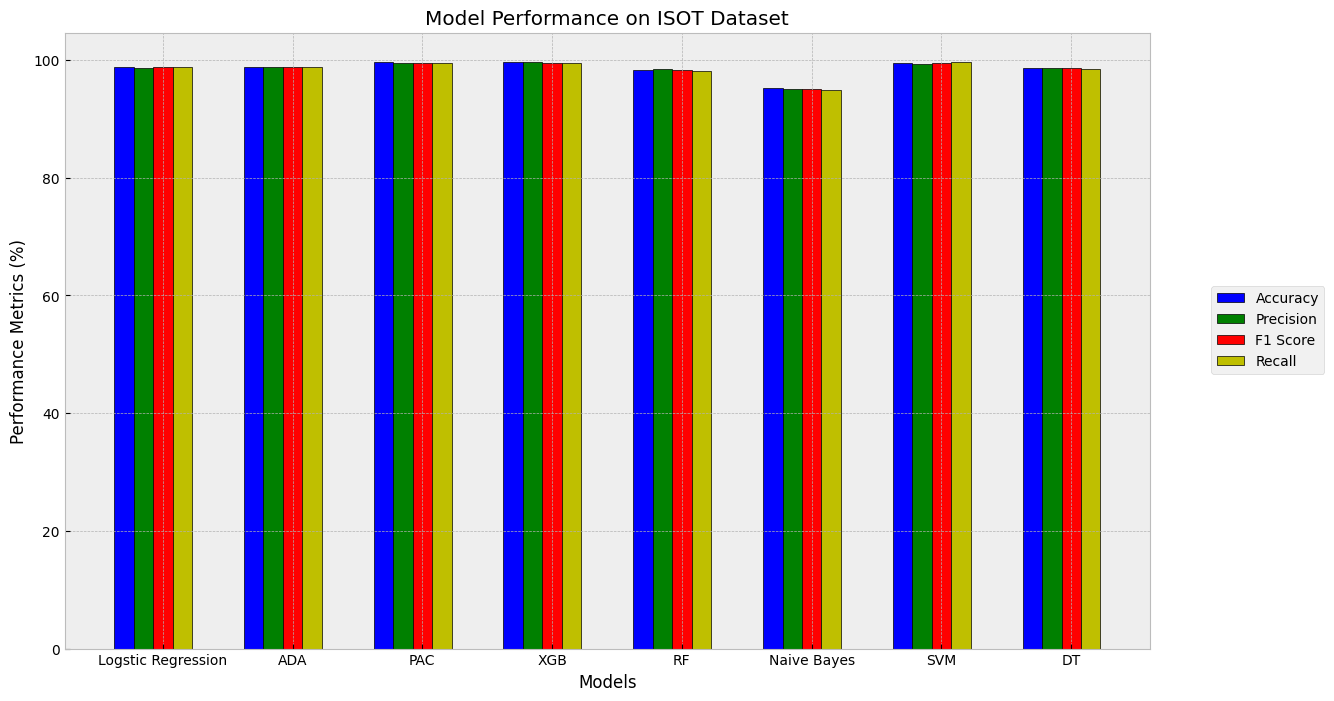

In [ ]:
plt.figure(figsize=(14,8))
n= len(var_models)
r = np.arange(n)
width = 0.15

plt.bar(r, [i*100 for i in var_accuracy], color = 'b',
        width = width, edgecolor = 'black',
        label='Accuracy')
plt.bar(r + width, [i*100 for i in var_precision], color = 'g',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width*2,  [i*100 for i in var_f1score], color = 'r',
        width = width, edgecolor = 'black',
        label='F1 Score')
plt.bar(r + width*3,  [i*100 for i in var_recall], color = 'y',
        width = width, edgecolor = 'black',
        label='Recall')

plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Model Performance on ISOT Dataset")

plt.xticks(r + width*2,var_models)
plt.legend(bbox_to_anchor = (1.05, 0.6))

plt.show()